# Twitter dataset analysis with Infomap

## Run pipelines

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import matplotlib.pyplot as plt
import seaborn as sns
from orchestrator import Orchestrator
from analysis_helper import AnalysisHelper

DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# LOGGING LEVEL
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [3]:
# PATHS
PROJECT_PATH = os.path.abspath('')
INPUT_PATH = os.path.join(PROJECT_PATH, 'input/')
OUTPUT_PATH = os.path.join(PROJECT_PATH, 'output/')
PROJECT_NAME = 'uk_healthcare_infomap'

In [4]:
# PIPELINE
o = Orchestrator(PROJECT_NAME, INPUT_PATH, OUTPUT_PATH)
o.execute()
ah = AnalysisHelper(o.datasources)

## Ranking

In [5]:
ah.get_rank_1().head(10)

,Unnamed: 0,user_name,rank
id,,,
1230,0,spriggsnutri,62.000
1136,1,critcarelthtr,61.833
1212,2,nutriciahcp_uk,61.560
1200,3,milaestevam1,61.500
1153,4,ficajones,61.429
1186,5,ldpartnership,61.333
1251,6,yvette_ot,61.333
1141,7,danielleroisin_,61.300
1198,8,michelledurkin7,61.278


Ranking function that takes into account:
* *Inverse in-degree*: In the considered graphs the hubs in the communities seems to be mostly related to associations and organizations. The smaller ones are more likely to be individuals.
* *Topical focus*: related to the interest the users have on the topic.

Formula:
\begin{align}
\mathit{R1}(u) & = \frac{1}{\sum_{u \in C} \mathit{IC}(u) + 1} \cdot \sum_{u \in C} \mathit{TF}(u)
\end{align}

In [6]:
ah.get_rank_2().head(10)

,Unnamed: 0,user_name,rank
id,,,
1519,0,smokefreelifeox,0.897445
2706,1,sambradley40,0.750000
1829,2,hatchbrenner,0.717650
301,3,jo_millar27,0.712329
842,4,nchawkes,0.706046
1472,5,kick_it_now,0.678992
2294,6,moz0373runner,0.666078
2733,7,aimsonhealth,0.654266
3095,8,wordsharkv5,0.647957


Formula:

\begin{align}
\mathit{R2}(u) & = \lvert \mathit{FR}(u) - 1 \rvert \cdot \left(\sum_{u \in C} \mathit{TA}(U) + \sum_{u \in C} \mathit{IC}(U)\right)
\end{align}

In [7]:
ah.get_rank_3().head(10)

,Unnamed: 0,user_name,rank
id,,,
667,0,hayleycorriganx,1.223958
1280,1,ceri_mcdade,1.194030
1760,2,theoremlean,1.131484
1465,3,jenny_spring,1.104823
1387,4,rramya_24,1.094595
2590,5,tonymitch99,1.068942
1259,6,amilasuljevic,1.054125
919,7,jhbrasfie,1.038339
1323,8,henrypowellw,1.031290


Formula:

\begin{align}
\mathit{R3}(u) & = \lvert \mathit{FR}(u) - 1 \rvert \cdot \left(\sum_{u \in C} \mathit{TA}(U) + \frac{1}{\sum_{u \in C} \mathit{IC}(U) + 1}\right)
\end{align}

# Similarity analysis between users

## TF-IDF

In [8]:
hashtags_vector = ah.get_bow()
print(hashtags_vector.shape)
hashtags_vector.head(10)

(925, 33526)


,#10000morevoices,#1000tweaks,#100birthday,#100calories,#100days,#100daysofactivity,#100daysofwalking,#100daysofwalkingseries2,#100daystoayoungerbrain,#100daystoeurovision,...,#مكة_المكرمة,#واس,#アート,#和你飛,#安値ギター快進撃2019,#東京マラソンexpo,#艺术,#보라해,#서직샵,#𝐀𝐧á𝐥𝐢𝐬𝐢𝐬
user_name,,,,,,,,,,,,,,,,,,,,,
1hannahcarr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1of2vics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020comms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272bookfaith,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_jcbfm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_jrwitt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_lindsaymillar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_paulturner_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
achanceforlife,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import numpy as np
doc_freq = hashtags_vector.astype(bool).sum()
doc_len = hashtags_vector.shape[0]
idf = np.log2(doc_len/doc_freq)
tf_idf = hashtags_vector.apply(lambda tf: tf * idf[tf.name], axis=0)

In [10]:
tf_idf_mean = tf_idf.mean()

In [11]:
ah.print_full(tf_idf_mean.sort_values(ascending=False).head(10))

#neuroendocrinecancer                   5.54
#epilepsy                               3.23
#neuro19                                2.95
#f1                                     2.76
#braininjury                            2.66
#mnd                                    2.60
#dyslexia                               2.55
#carers                                 2.54
#pg                                     2.45
#maga                                   2.43
dtype: float64


TOPIC DEMENTIA


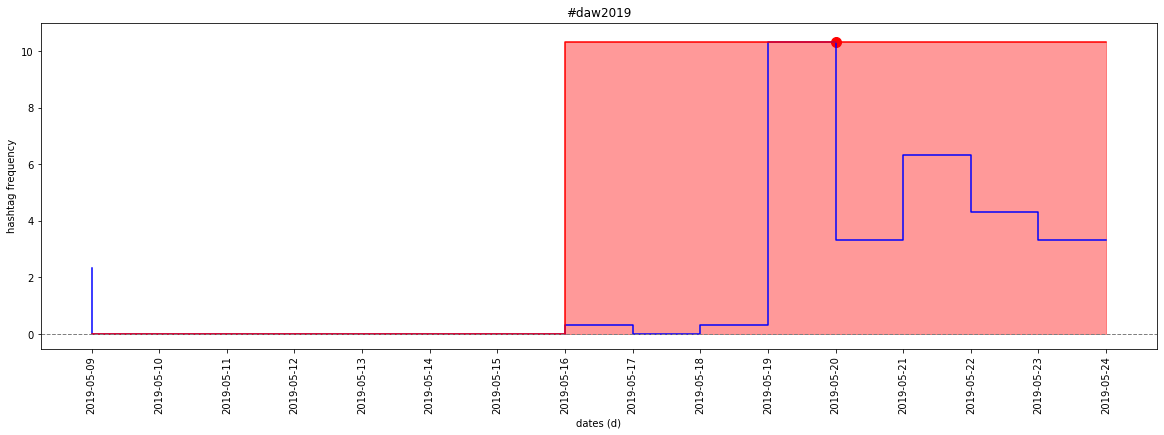

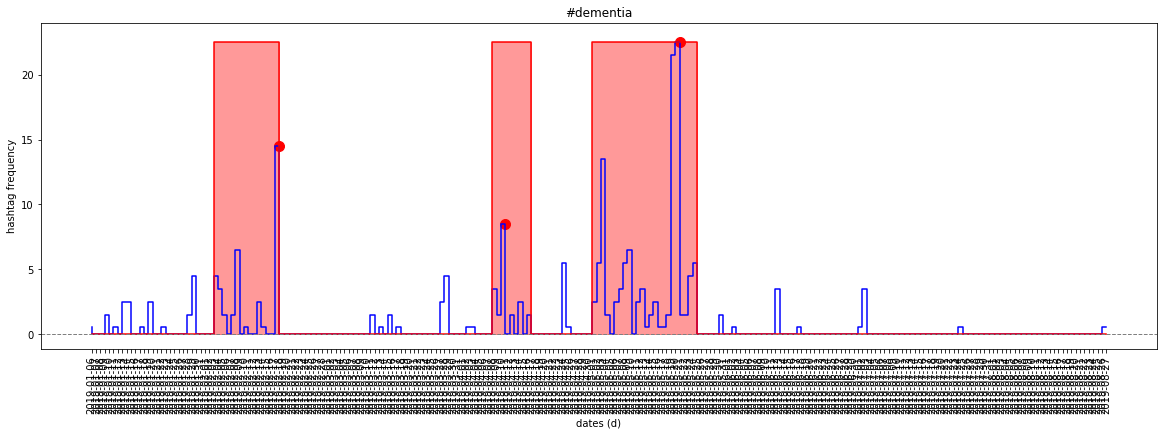

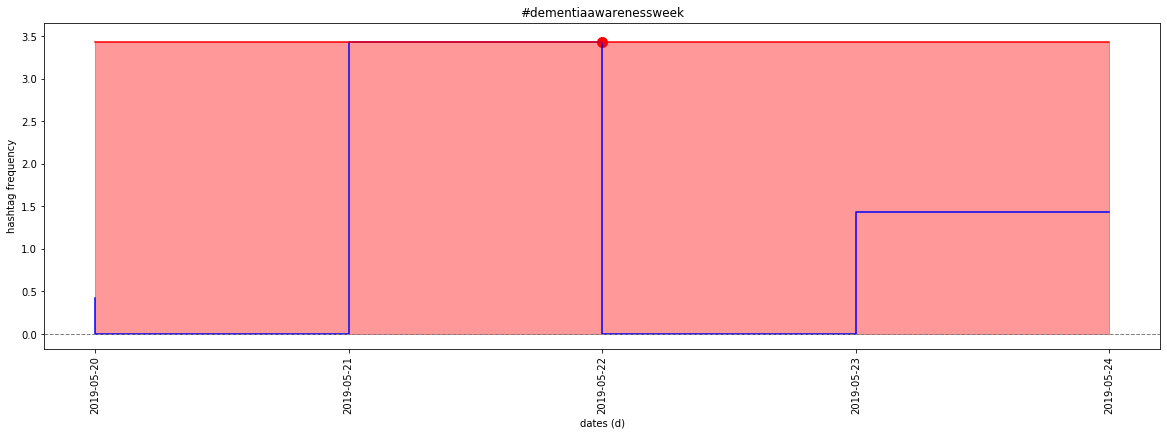

TOPIC RHEUMATOID ARTHRITIS


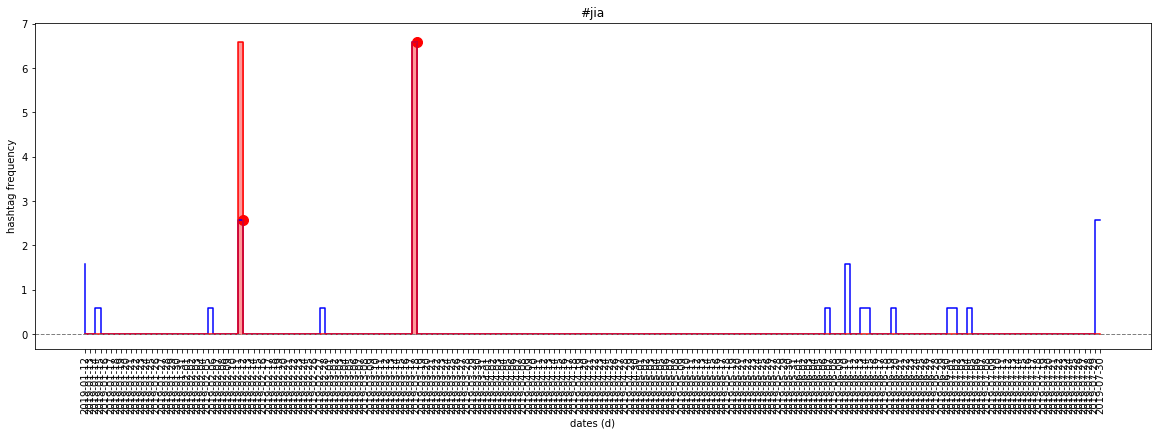

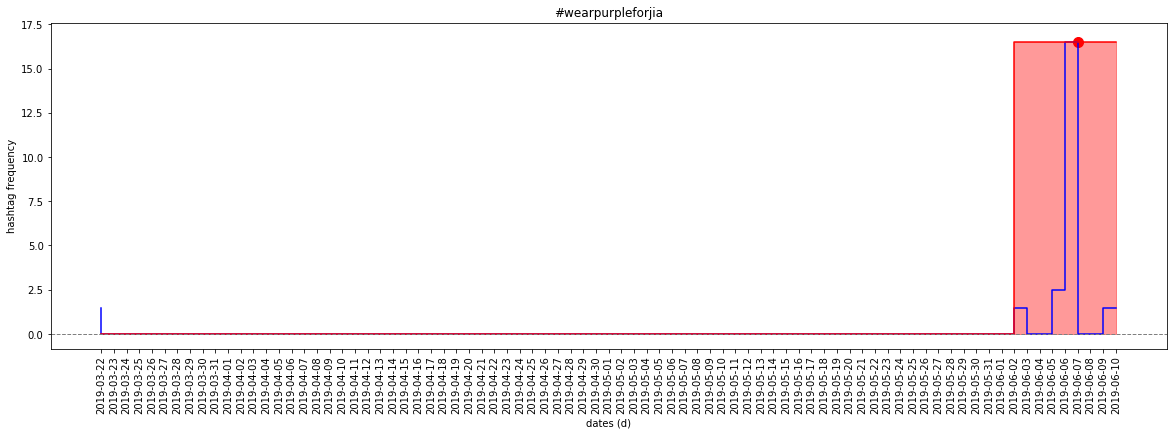

TOPIC MND


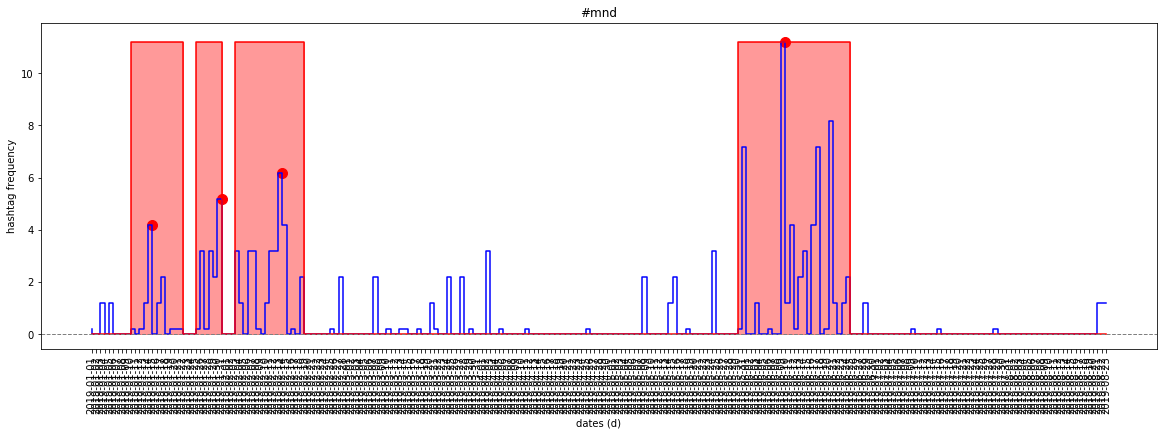

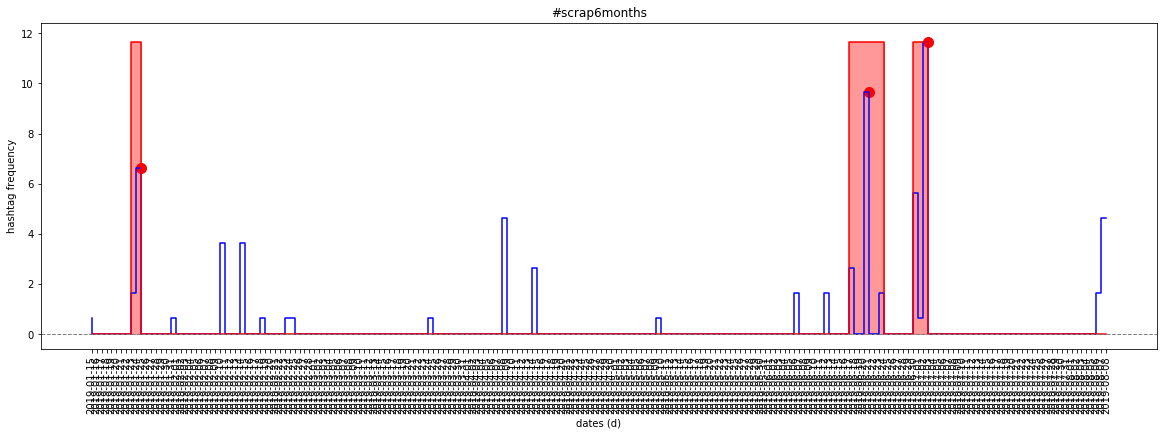

TOPIC NURSES


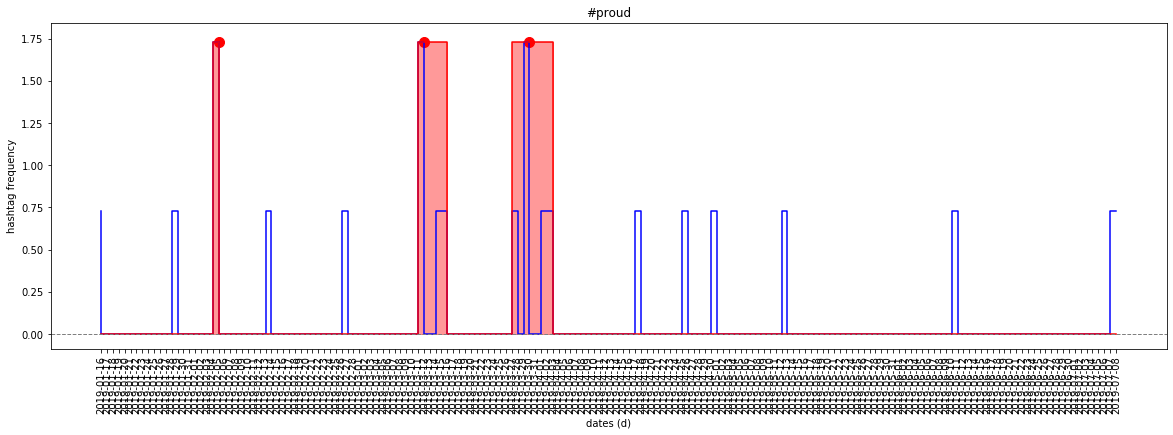

TOPIC BRAIN


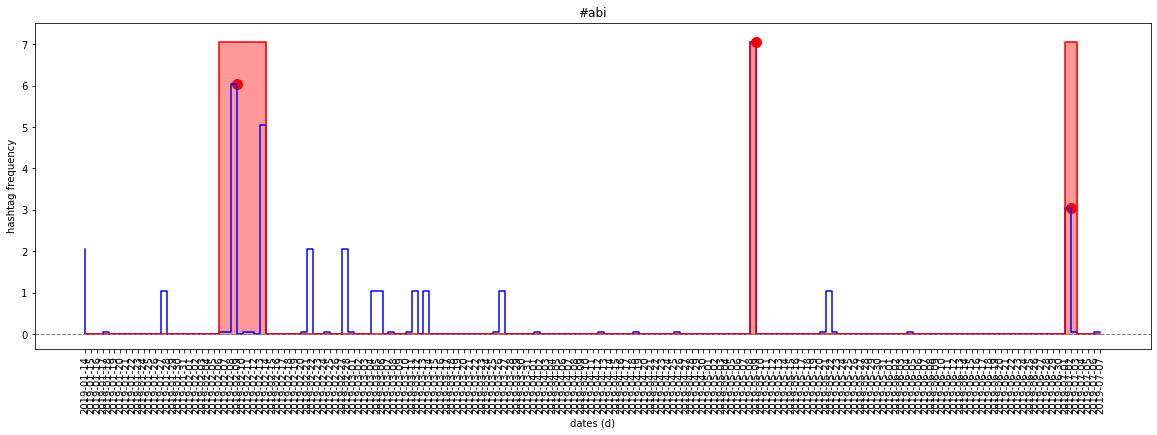

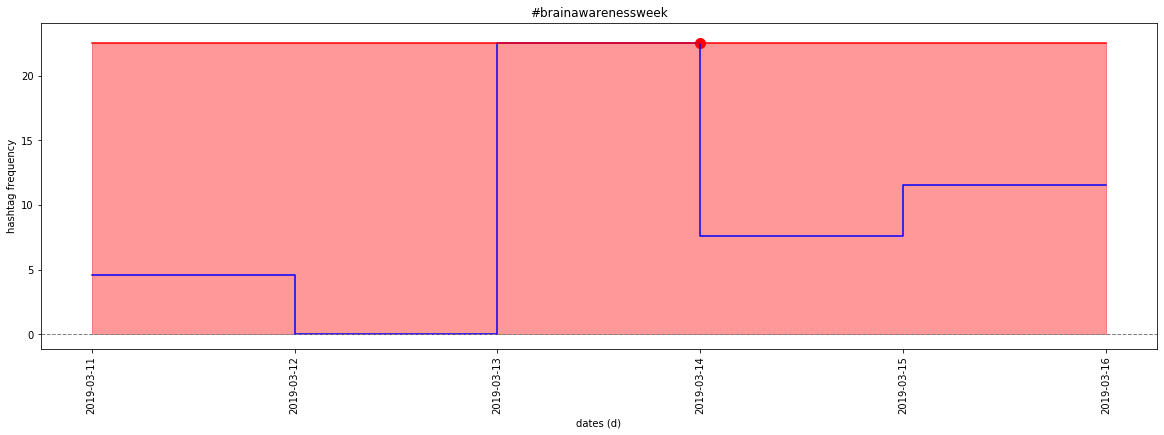

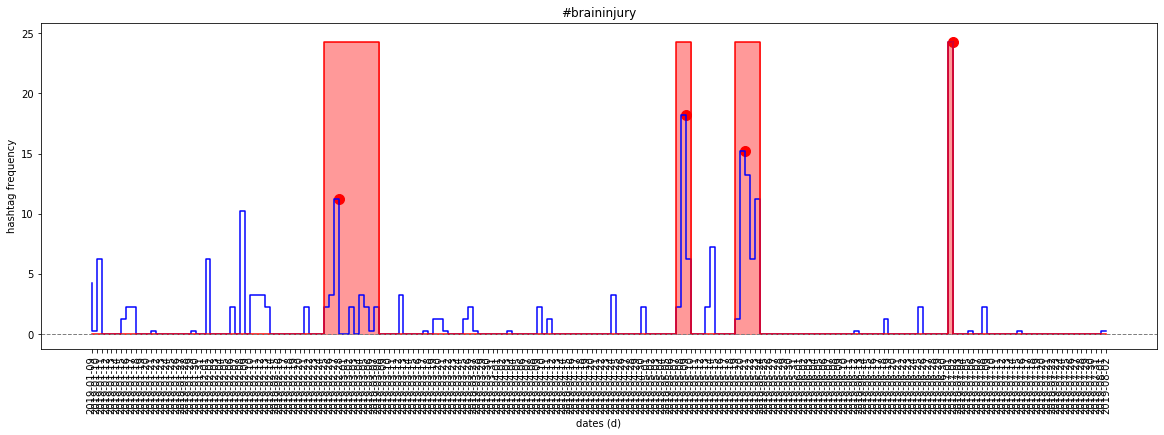

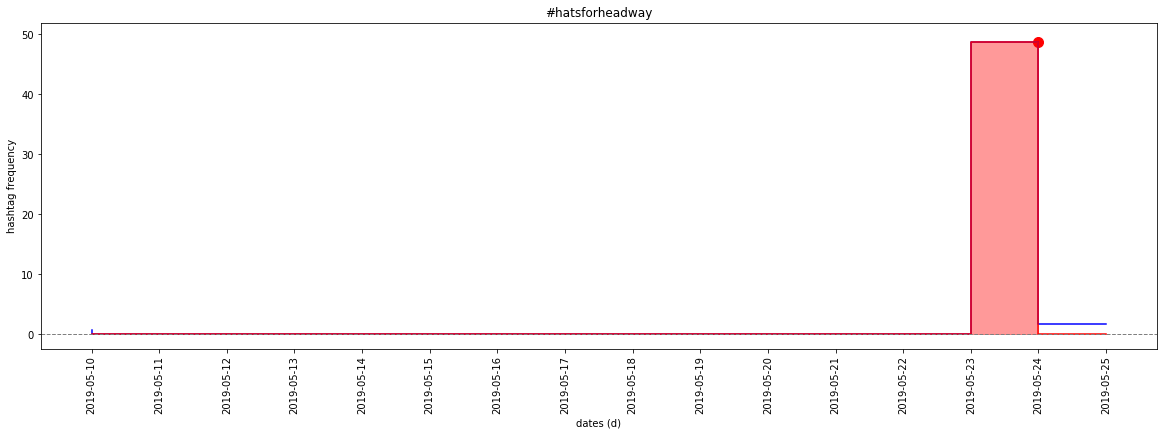

TOPIC WOMEN
TOPIC CANCER
TOPIC CARERS


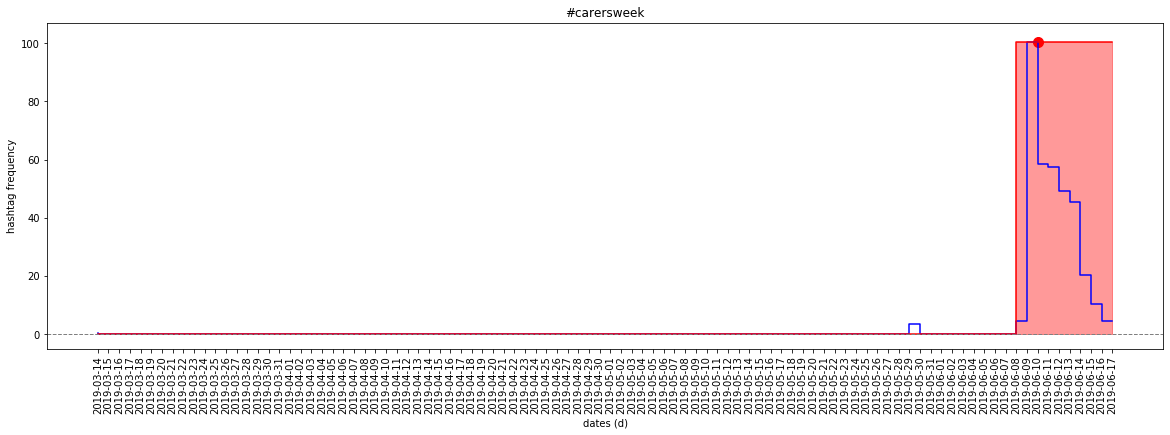

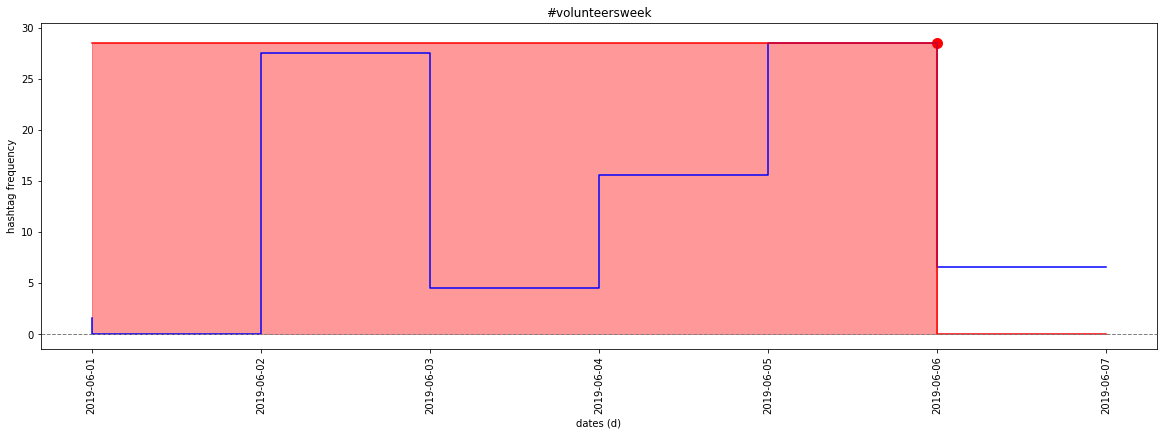

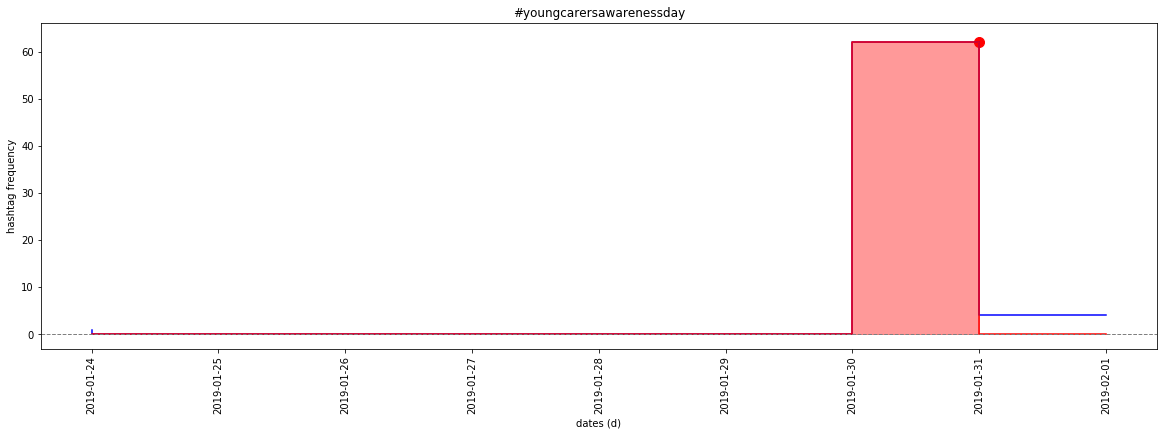

TOPIC AUTISM


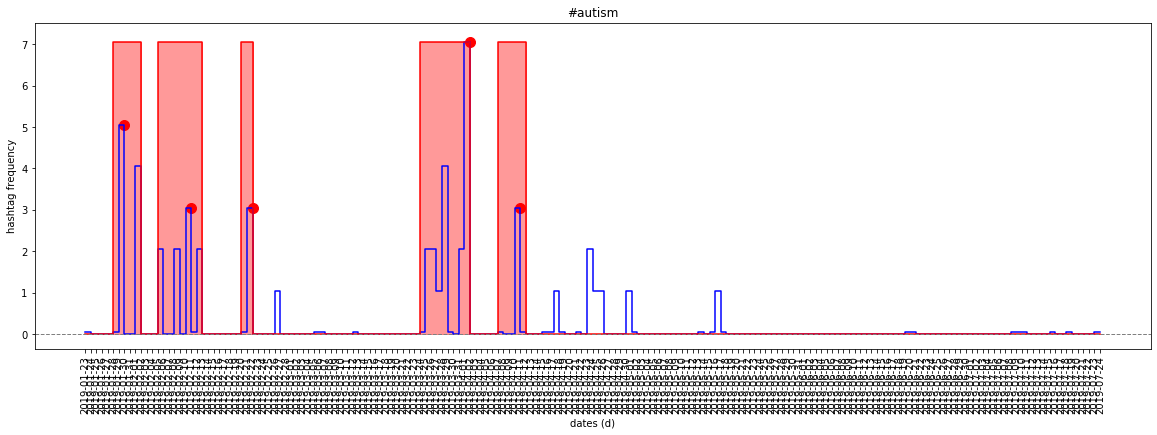

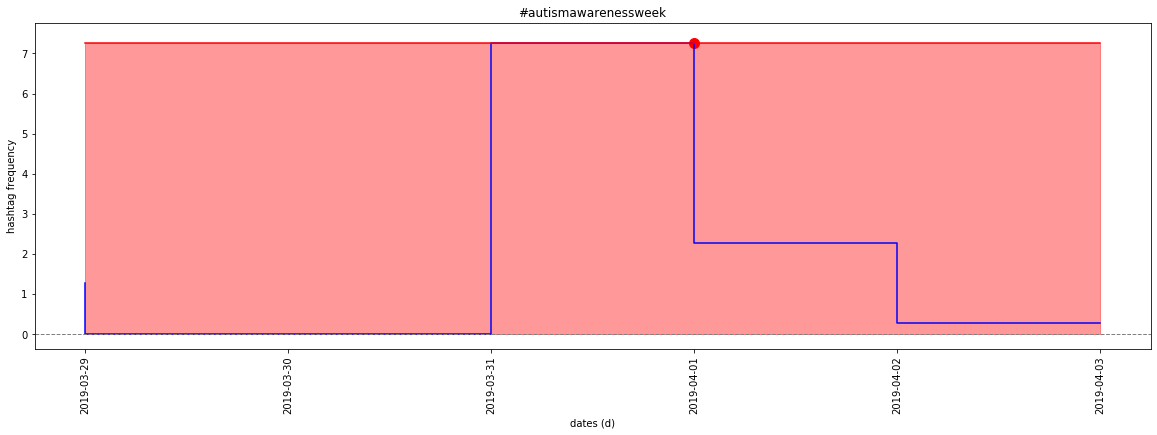

TOPIC EPILEPSY


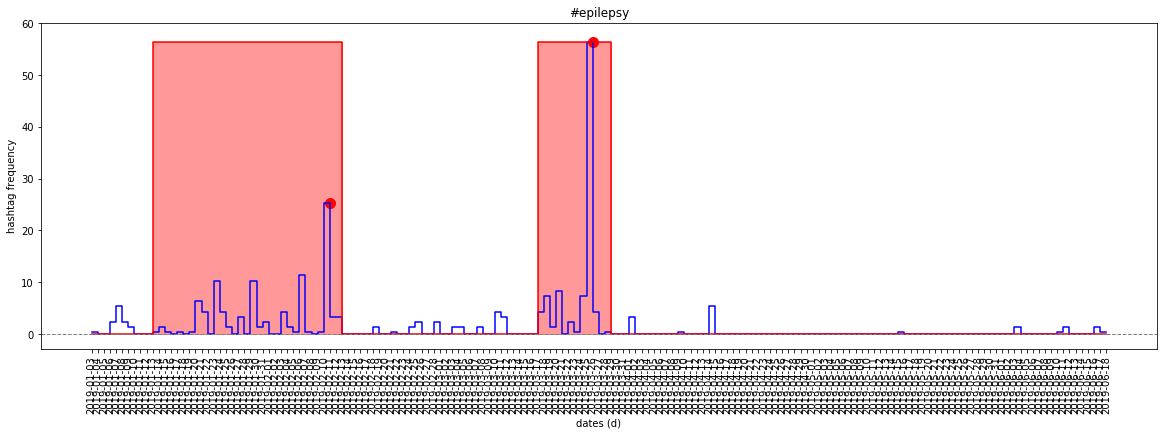

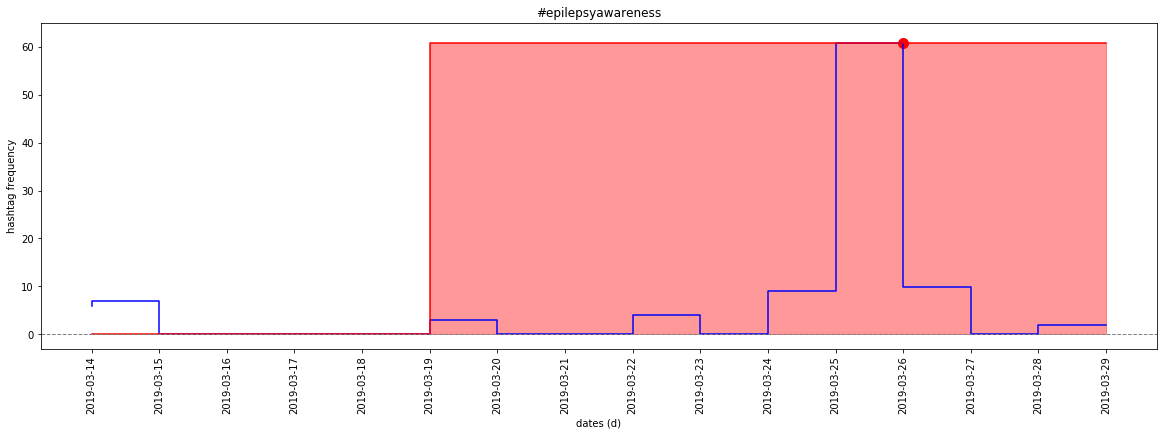

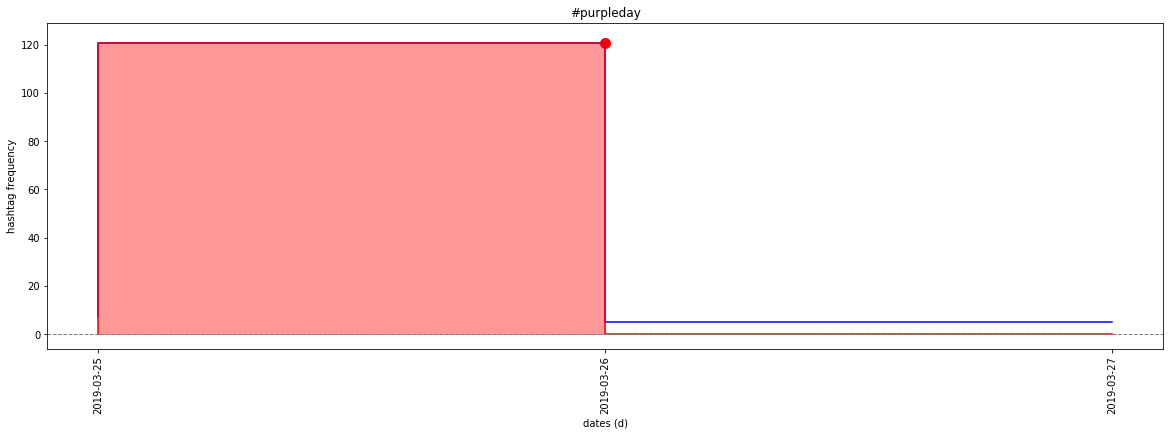

TOPIC MENTALHEALTH


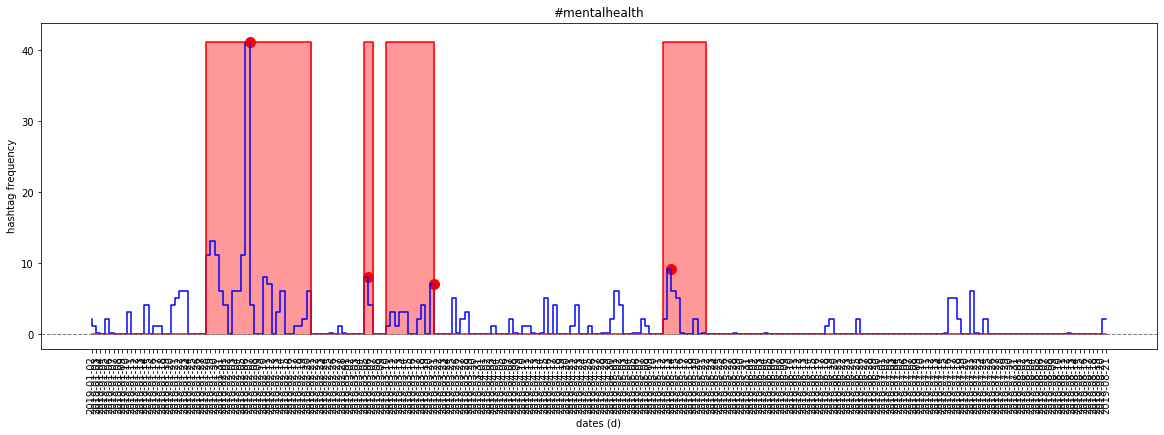

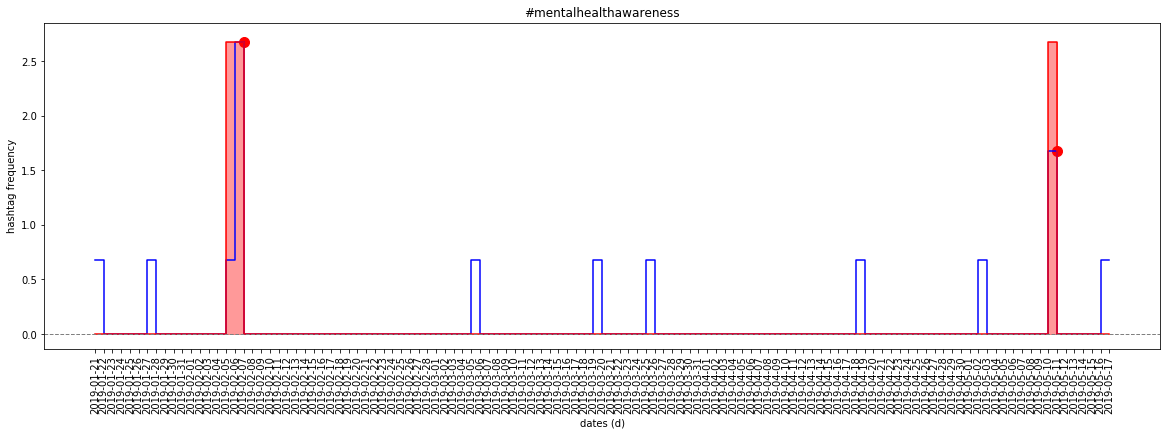

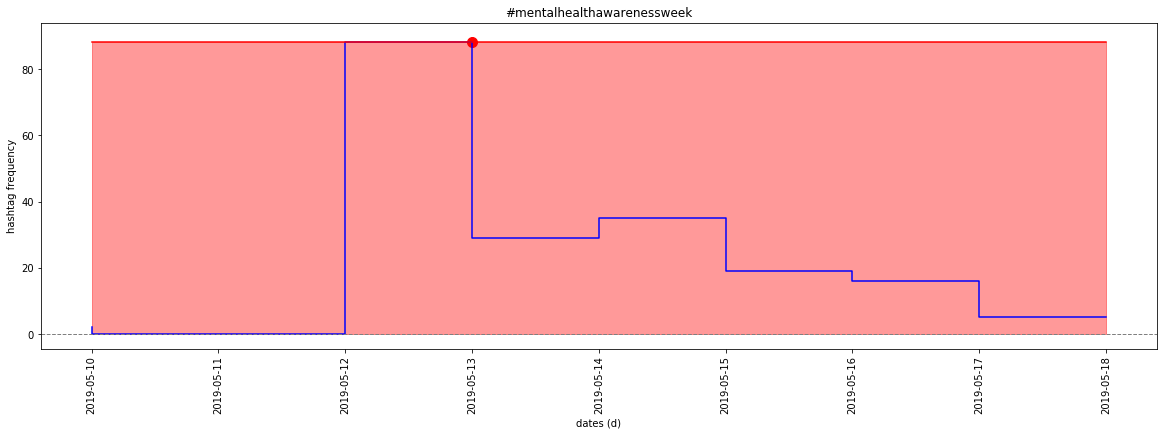

TOPIC OTHERS


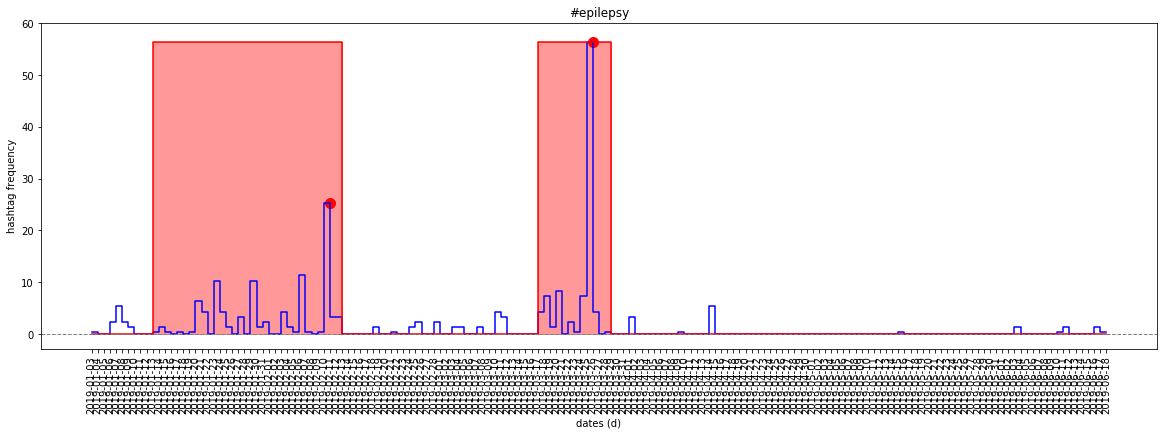

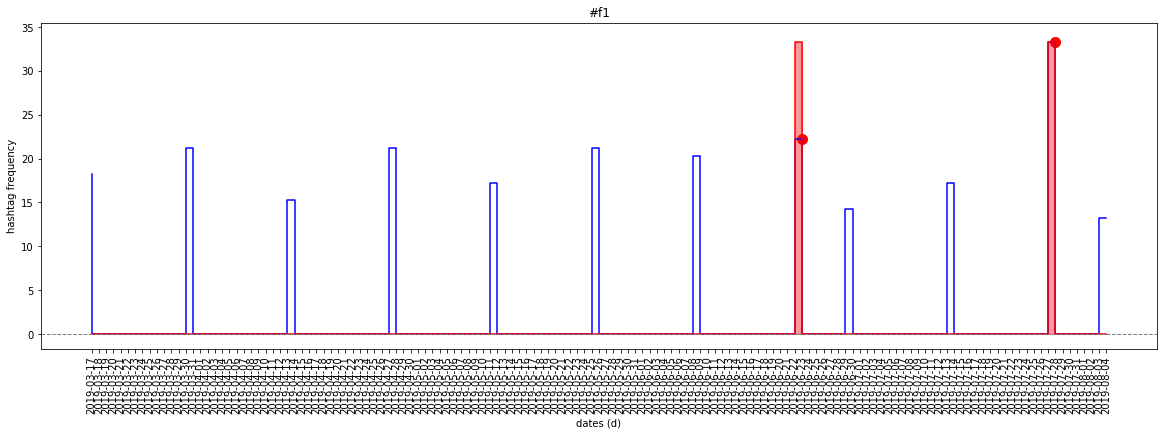

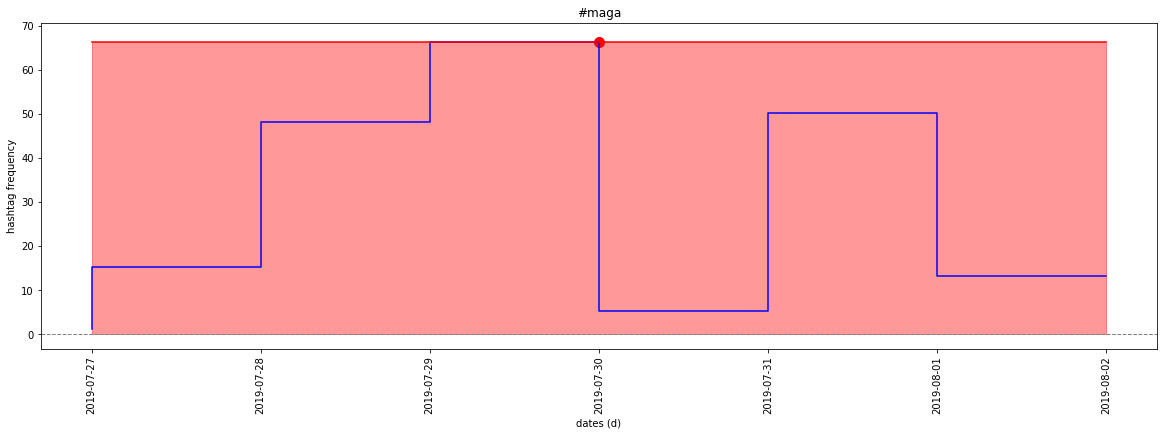

In [9]:
contexts_dict = {
    'dementia': ['#dementia', '#daw2019', '#dementiaactionweek', '#dementiaawarenessweek', '#dementiaactionweek2019'],
#     'smoking': ['#nosmokingdays'],
    'rheumatoid arthritis': ['#wearpurpleforjia', '#eular2019', '#jia'],
    'mnd': ['#mnd', '#scrap6months'],
    'nurses': ['#proud', '#internationalnursesday'],
    'brain': ['#braininjury', '#brainawarenessweek', '#abi', '#abiweek', '#hatsforheadway'],
    'women': ['#internationalwomensday', 'iwd2019'],
    'cancer': ['#worldcancerday', '#rarediseasesday'],
    'carers': ['#carersweek', '#volunteersweek', '#youngcarersawarenessday', '#worldautismawarenessday'],
    'autism': ['#autism', '#autismawarenessweek'],
    'epilepsy': ['#epilepsy', '#purpleday', '#epilepsyawareness', '#epilepsyawarenessday', '#purpleday2019', '#internationalepilepsyday'],
    'mentalhealth': ['#mentalhealth', '#mentalhealthawarenessweek', '#eatingdisordersawareness', '#stressawarenessmonth', '#mentalhealthawareness'],
#     'hydration': ['#nutritionhydrationweek'],
    'others': ['#f1', '#maga', '#epilepsy']
}

for topic, h_list in contexts_dict.items():
    print('TOPIC ' + topic.upper())
    ah.show_peaks(h_list)

## Bipartite graph

In [15]:
unique_frequencies = set()
hashtags_vector.apply(lambda x: unique_frequencies.update(x.unique()), axis=0)
unique_frequencies.remove(0)

In [16]:
import pandas as pd
import networkx as nx
freqs_pairs = pd.DataFrame({'frequencies': list(unique_frequencies)}).set_index('frequencies')
freqs_pairs['edges'] =\
freqs_pairs.index.map(lambda i: [(hashtags_vector.index[x], hashtags_vector.columns[y])
                                 for x, y in zip(*np.where(hashtags_vector.values == i))])
freqs_pairs.head(10)

,edges
frequencies,
1,"[(1hannahcarr, #aac), (1hannahcarr, #abiweek),..."
2,"[(1hannahcarr, #actionforbraininjuryweek), (1h..."
3,"[(1hannahcarr, #backpain), (1hannahcarr, #chro..."
4,"[(1hannahcarr, #abi), (1hannahcarr, #charity),..."
5,"[(1hannahcarr, #volunteers), (1of2vics, #spsm)..."
6,"[(1hannahcarr, #fundraising), (1hannahcarr, #p..."
7,"[(1hannahcarr, #londonmarathon), (1hannahcarr,..."
8,"[(1of2vics, #elevatetheconvo), (2020comms, #la..."
9,"[(2020comms, #maladministration), (272bookfait..."


Create an undirected bipartite graph with hashtags and users as node types and frequencies as weights.

In [17]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()

# Add nodes with the node attribute "bipartite"
user_nodes = hashtags_vector.index.tolist()
hashtags_nodes = hashtags_vector.columns.tolist()
B.add_nodes_from(user_nodes, bipartite=0)
B.add_nodes_from(hashtags_nodes, bipartite=1)

# Add edges only between nodes of opposite node sets
for freq, row in freqs_pairs.iterrows():
    B.add_edges_from(row['edges'], weight=freq)

In [18]:
nx.write_gexf(B, path='/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/bipartite.gexf')

## Users and hashtags network

In [19]:
def get_graph(network_df, network_name):
    graph = nx.Graph()

    # create nodes and edges
    nodes = pd.concat([network_df[network_df.columns[0]], network_df[network_df.columns[1]]], axis=0)\
    .drop_duplicates().tolist()
    edges = network_df.to_records(index=False).tolist()

    # add nodes and edges to graph
    graph.add_nodes_from(nodes)
    graph.add_weighted_edges_from(edges)

    # save graph
    nx.write_gexf(graph,
                  path='/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/' +
                  network_name + '.gexf')
    
    return graph

### Users network

In [20]:
users_network = ah.get_users_network()
users_graph = get_graph(users_network, 'users_network')

### Hashtags network

In [21]:
hashtags_network = ah.get_hashtags_network()
hashtags_graph = get_graph(hashtags_network, 'hashtags_network')

## Add weights to bipartite graph

In [22]:
users = [node for node, node_type in B.nodes(data='bipartite') if node_type == 0]
filtered_users_network = users_network[users_network['from_username'].isin(users) &
                                       users_network['to_username'].isin(users)].reset_index(drop=True)

In [23]:
hashtags = [node for node, node_type in B.nodes(data='bipartite') if node_type == 1]
filtered_hashtags_network = hashtags_network[hashtags_network['from_hashtag'].isin(hashtags) &
                                             hashtags_network['to_hashtag'].isin(users)].reset_index(drop=True)

In [24]:
users_network_edges = filtered_users_network.to_records(index=False).tolist()
B.add_weighted_edges_from(users_network_edges)

hashtags_network_edges = filtered_hashtags_network.to_records(index=False).tolist()
B.add_weighted_edges_from(hashtags_network_edges)

# save graph
nx.write_gexf(B,
              path='/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/bipartite_complete.gexf')

## Correlations between users wrt hashtags

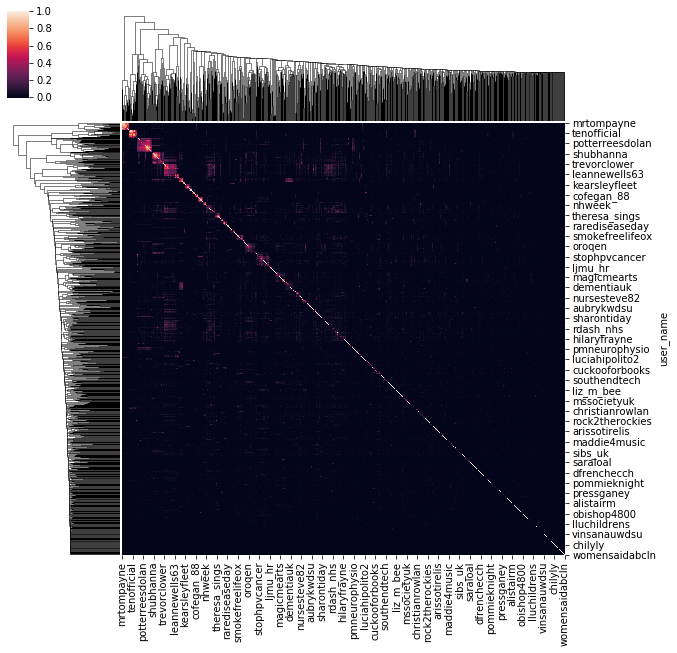

In [25]:
users_corr = ah.get_users_corr()
sns.clustermap(users_corr);

In [25]:
# from sklearn.cluster import AgglomerativeClustering
# import numpy as np
# X = users_corr.values
# clustering = AgglomerativeClustering().fit(X) 
# AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', linkage='ward')
# list(zip(clustering.labels_, users_corr.index))

In [24]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
hashtags_vector = ah.get_bow()

M_u = hashtags_vector.mean(axis=1)
item_mean_subtracted = hashtags_vector - M_u[:, None]
csim = cosine_similarity(item_mean_subtracted)
csim = pd.DataFrame(data=csim,
                    index=hashtags_vector.index,
                    columns=hashtags_vector.index)

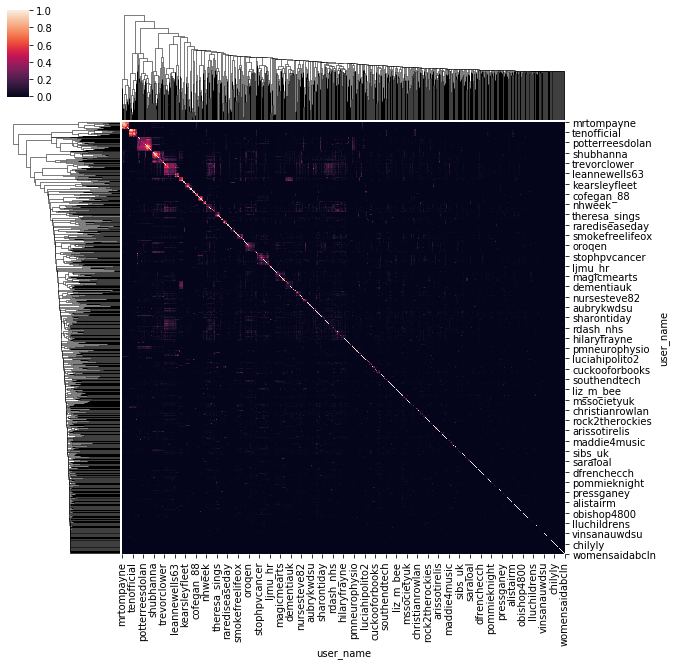

In [25]:
sns.clustermap(csim);

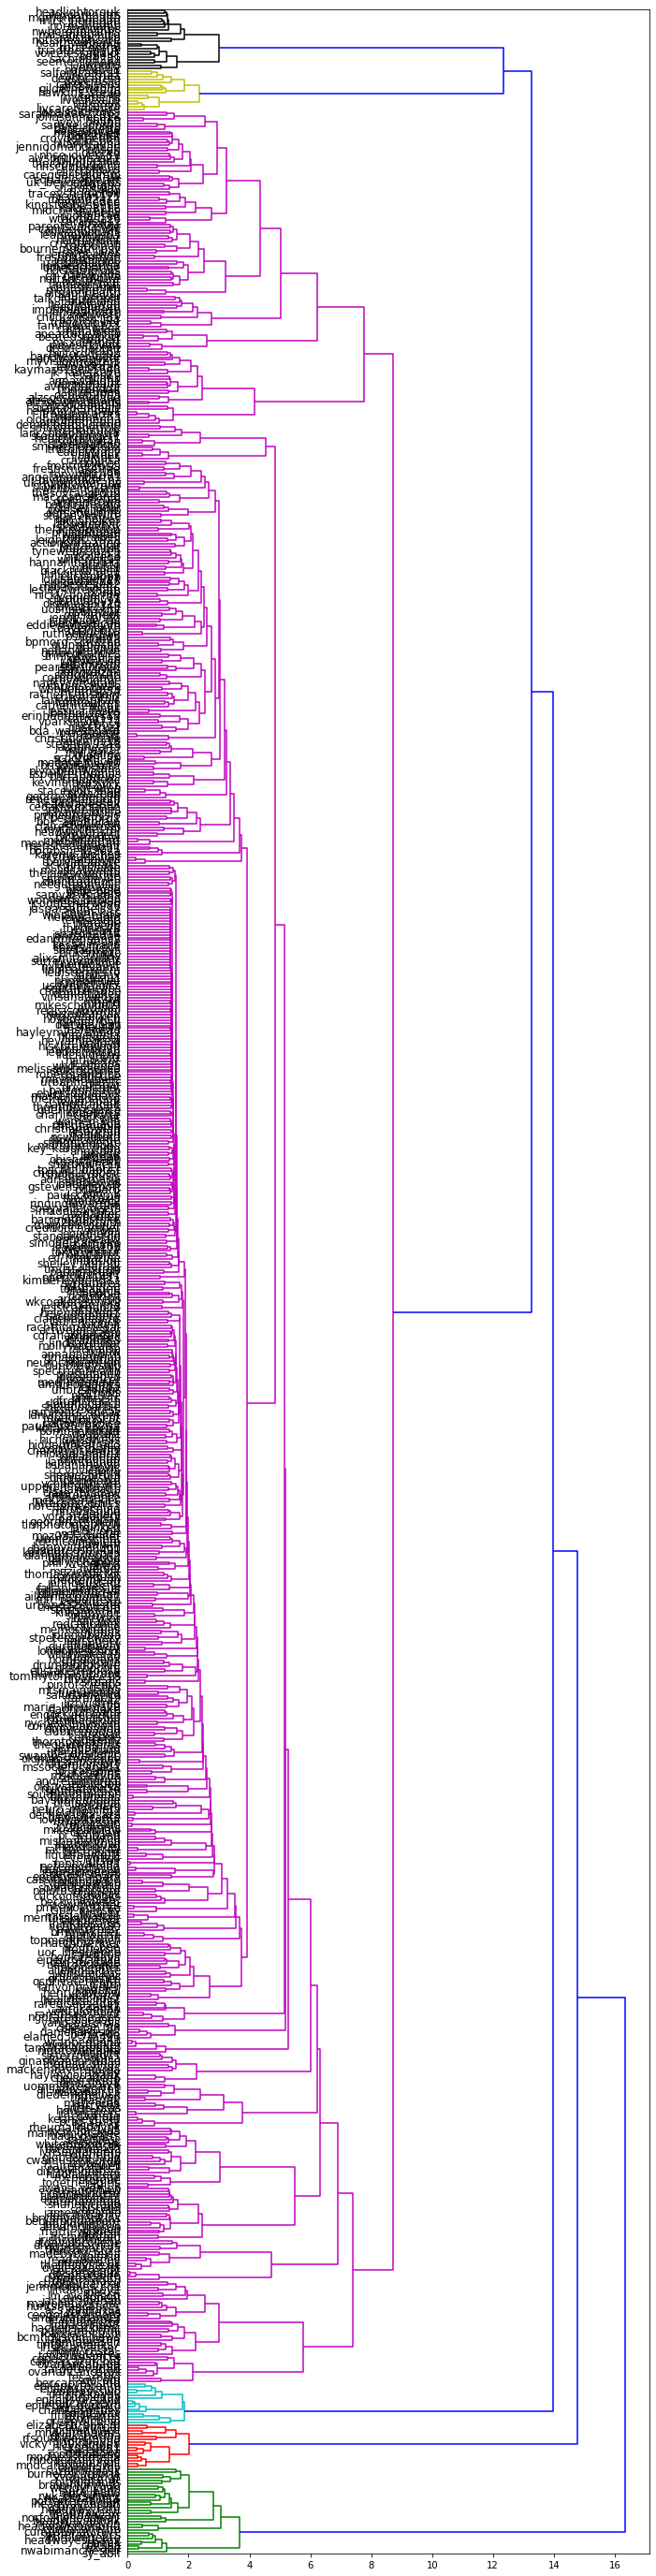

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(csim.values, 'ward')

plt.figure(figsize=(10, 50))  
dendrogram(linked,
           labels=csim.index,
           orientation='right',
           distance_sort='descending',
           leaf_font_size=12.,
           show_leaf_counts=True)
plt.show()

In [14]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [27]:
plt.figure(figsize=(10, 50))

# dendrogram(linked,
#            labels=csim.index,
#            orientation='right',
#            distance_sort='descending',
#            leaf_font_size=12.,
#            show_leaf_counts=True)

fancy_dendrogram(
    linked,
    labels=csim.index,
    orientation='right',
    distance_sort='descending',
    truncate_mode='lastp',
    show_leaf_counts=True,
    
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

NameError: name 'fancy_dendrogram' is not defined

<Figure size 720x3600 with 0 Axes>

# KMEANS

In [16]:
hashtags_vector = ah.get_bow()

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn import metrics

In [18]:
svd = TruncatedSVD(n_components=150, n_iter=7, random_state=42)
svd.fit(hashtags_vector)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(hashtags_vector)

[0.17511945 0.03862288 0.03668477 0.03210138 0.02512089 0.02390875
 0.02209444 0.02009062 0.01753826 0.01682822 0.01606184 0.01574821
 0.01539576 0.01330058 0.01202647 0.01172901 0.01153298 0.01093104
 0.01072323 0.01042966 0.00898469 0.00866033 0.0081518  0.00806404
 0.00760107 0.00731511 0.0072828  0.00679901 0.00645303 0.00674907
 0.00666859 0.00668907 0.00631646 0.00603029 0.00585976 0.00528485
 0.00516201 0.00497223 0.00479981 0.00472466 0.0044944  0.00427255
 0.00423115 0.00412553 0.00391021 0.00383911 0.00365788 0.00354834
 0.00342611 0.00343211 0.00340202 0.00339417 0.00337295 0.00320552
 0.00308963 0.00307423 0.00302043 0.00300369 0.00295664 0.00291703
 0.00290031 0.00285217 0.00270967 0.00264197 0.00264397 0.0026175
 0.00258585 0.00257092 0.00256246 0.00254982 0.00252963 0.00242485
 0.00241202 0.00239692 0.00237216 0.00230468 0.00226365 0.00218453
 0.00215739 0.00213238 0.00208877 0.00206698 0.00202163 0.00199795
 0.00198555 0.00197711 0.00196711 0.00193794 0.00188333 0.00185

In [19]:
km = KMeans(n_clusters=len(o.datasources.contexts.get_context_names()))
km.fit(X)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([hashtags_vector.index, labels]).T

In [20]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand-Index: 1.000
Silhouette Coefficient: 0.200


In [21]:
results[1].describe()

count     941
unique     25
top        11
freq      208
Name: 1, dtype: int64

In [22]:
resultss = results.rename(columns={0: 'user_name', 1: 'cluster'}).sort_values(by='cluster').reset_index(drop=True)
resultss

,user_name,cluster
0,castlemall,0
1,moralfibres,0
2,choctradingco,0
3,tnorwich1,0
4,norfolkwheadway,0
5,epixmedia,0
6,asblawuk,0
7,old_waterworks,0
8,thinkhesarus,0
9,ec_magazine,0


In [23]:
for c in o.datasources.contexts.get_context_names():
    context_users = o.datasources.files.read('network_creation', 'create_nodes', 'nodes', 'csv', c)['user_name']
    resultss[c] = resultss['user_name'].isin(context_users)
clusters = resultss.groupby('cluster').sum().idxmax(axis=1).to_frame().rename(columns={0: 'context'})
clusters['size'] = resultss.groupby('cluster').size()
clusters['value'] = resultss.groupby('cluster').sum().apply(max, axis=1).astype(int)
clusters['ratio'] = (clusters['value'] / clusters['size']).round(2)
print(f'unique contexts number: {clusters.context.nunique()}')
clusters

unique contexts number: 19


,context,size,value,ratio
cluster,,,,
0,dementia-action-week-2018,24,7,0.29
1,no-smoking-day-2018,43,23,0.53
2,dry-january-2018,89,12,0.13
3,nutrition-and-hydration-week-2018,64,13,0.20
4,16-days-of-action-2018,38,28,0.74
5,eating-disorder-awareness-week-2018,68,13,0.19
6,mnd-awareness-month-2018,22,21,0.95
7,brain-awareness-week-2018,31,23,0.74
8,experience-of-care-week-2018,21,20,0.95
